<a href="https://colab.research.google.com/github/daC0rtes/E-D-A/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
# primera tarea: intentar traer las tablas de los doce meses  y crear un solo csv con la info

# onlyfiles = [f for f in listdir("/content") if isfile(join("/content", f))]
# con el metodo anterior nos ahorramos el paso de numpy, pero me apego al video guia :)

# Alternativa

onlyfiles = [file for file in os.listdir("/content")]

data_meses = pd.DataFrame()  #inicializamos un dataframe vacio para despues concatenar

#notamos que hay  elementos que nos estan molestando, los eliminamos.
#recordar que el core de pandas usa numpy

indices =[0,10,14]
onlyfiles = np.delete(onlyfiles,indices)


for file in onlyfiles:
   df = pd.read_csv("/content/" + file) # lee uno por uno cada csv de la carpeta content
   data_meses = pd.concat([data_meses,df])

data_meses.head()
data_meses = data_meses.sort_values(['Order Date'])
data_meses.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


In [ ]:
# En colab, bajo mi experiencia es importante no correr el codigo anterior de nuevo
# ya que nos podria generar una actualizacion del array onlyfiles  agregando info que no nos compete
# e implicaria  borrar por medio de numpy y blablabla, en dado caso usar docemeses.csv como "control de version"
nuevo = data_meses.to_csv("docemeses.csv", index=False)

In [2]:
completo = pd.read_csv("/content/docemeses.csv")
completo.head()

<ipython-input-2-8ddf0bd9bdf0>:1: DtypeWarning: Columns (0,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  completo = pd.read_csv("/content/docemeses.csv")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.0,01/01/19 04:56,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


Limpieza de datos.

Ejemplo:
valores no existentes


In [3]:
#con esto podemos observar que las ultimas filas constan de valores na
# completo.tail(100)
# descartamos esas filas

nan_df = completo[completo.isna().any(axis=1)]
nan_df.head() # esta organizado por la previa modificacion
completo = completo.dropna(how= 'all')
#este hiperparametro toma en cuenta que en todas las columnas haya un nan
# por el contrario si se usara 'any' en vez de 'all' eliminaria aquellas  filas que contengan al menos un nan
#completo.tail()
# vemos que satisfactoriamente se eliminaron las filas llenas de nan

In [4]:
#hay un error con 'Or', encontrar y borrarlo
#notar que en vez de borrarlo directamente podemos hacer que lo ignore con !=
completo = completo[completo['Order ID'].str[0:2] != 'Or']
completo.head()
#observamos que hay una duplicacion en la informacion

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.0,01/01/19 04:56,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


Agregamos una columna que nos indique e mes

In [5]:
completo['Month'] = completo['Order Date'].str[0:2]
completo['Month'] = completo['Month'].astype('int32')
completo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1
2,149343,Apple Airpods Headphones,1,150.0,01/01/19 04:56,"735 5th St, New York City, NY 10001",1
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1


In [16]:
#convertimos las columnas en el tipo que es, eje cantidad esta en tipo str
completo['Quantity Ordered'] = completo['Quantity Ordered'].astype('int32')
completo['Price Each'] = pd.to_numeric(completo['Price Each']) #otro metodo
completo.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales                object
dtype: object

Agregamos una columna de ventas

In [19]:
completo['Sales'] = completo['Quantity Ordered'] * completo['Price Each']
completo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90


Agregamos una columna que nos indique ciudad

In [48]:
#alternativa 1 "mia"
# completo['City'] = completo['Purchase Address'].str.split(',').str[1]
#alternativa 2 "video"
# completo['columna'] = completo['Purchase Address'].apply(lambda x: x.split(',')[1])
#lo beneficioso de esta alternativa dos es que el metodo apply nos permite abordar la aternativa 3

def ciudad(address):
  return address.split(',')[1]

def estado (address):
  return address.split(',')[2].split(' ')[1]

completo['Columna'] = completo['Purchase Address'].apply(lambda x: ciudad(x)+' ('+ estado(x) + ')' )

# completo = completo.drop(['City','columna','columna2'],axis=1)
# notar que pueden existir valores repetidos, es decir  puede haber dallas de diferentes estados

completo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Columna
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY)
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY)
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX)
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA)


###1. Cual fue el mejor mes en cuestion de ventas?

cuanto se gano ese mes?

In [26]:
#recordar que para organizarlo de mayor a menor ascending = False
completo.groupby(['Month']).sum().sort_values('Sales', ascending= False)
#si embargo notar que el .sort_values "sobraria" en este caso ya que con solo sum
#y al ser un set de datos pequeño, cisualmente se podria concluir de manera rapida
results = completo.groupby(['Month']).sum()
print(results)

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


<ipython-input-26-39ded4ee9aaa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  completo.groupby(['Month']).sum().sort_values('Sales', ascending= False)
<ipython-input-26-39ded4ee9aaa>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = completo.groupby(['Month']).sum()


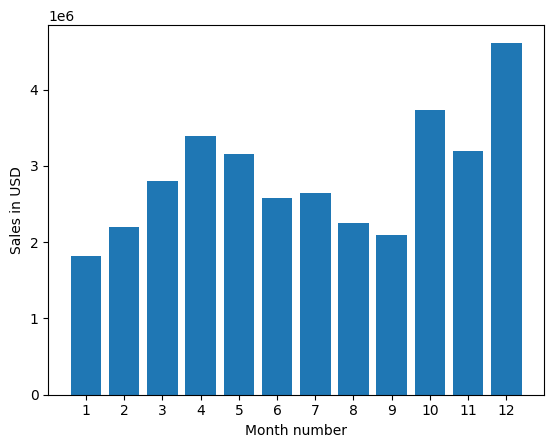

In [29]:
import matplotlib.pyplot as plt
months= range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()


#### 2. Cual fue la ciudad en la que mas se vendio?

In [53]:
result_city = completo.groupby(['Columna']).sum()
result_city.sort_values('Sales',ascending=False)

<ipython-input-53-6c49cfb12680>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_city = completo.groupby(['Columna']).sum()


,Quantity Ordered,Price Each,Month,Sales
Columna,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


In [54]:
len(result_city)

10

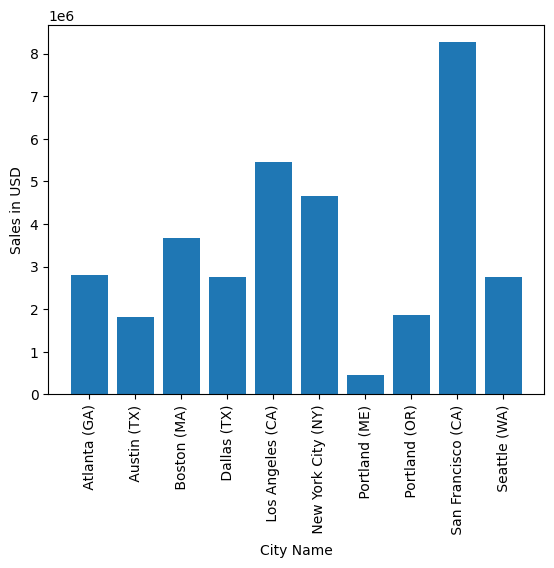

In [59]:
#alternativa 2 si no se quiere o no es facil usar range()
#sin embargo necesitamos que  cities y result_city  tengan el mismo orden
#cities= completo['Columna'].unique()
#si lo dejamos sin esta modificacion, apareceria que Austin fue la ciudad con mas ventas
cities =[ ciudad for ciudad, df in completo.groupby('Columna')]
plt.bar(cities,result_city['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City Name')
plt.show()


### A que hora se deberian "publicar" mas anuncios con tal de maximizar la compra de productos?

In [65]:
#lo recomendable por el autor es no usar to_datetime en dataframes muy muy grandes
completo['Order Date'] = pd.to_datetime(completo['Order Date'])


In [66]:
#ventajas de trabajar con datetime, dt.hour
completo['Hour'] = completo['Order Date'].dt.hour
completo['Minute'] = completo['Order Date'].dt.minute
completo.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Columna,Hour,Minute
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City (NY),3,7
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA),3,40
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City (NY),4,56
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas (TX),5,53
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta (GA),6,3


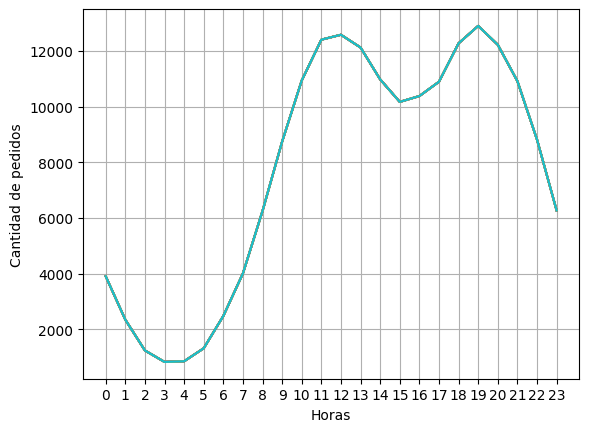

In [70]:
horas = [ hora for hora, df in completo.groupby('Hour')]
plt.plot(horas,completo.groupby(['Hour']).count())
plt.xticks(horas)
plt.xlabel('Horas')
plt.ylabel('Cantidad de pedidos')

plt.grid()
plt.show()
#completo.groupby(['Hour']).count()
#rta a la pregunta:se deberia transmitir publicidad a las 11 am o 7pm

### Cuales son los productos que se venden juntos mas seguido?

In [101]:
#notemos, para que dos articulos se vendieran "juntos" estos deberian compartir su "Order ID"
df = completo[completo['Order ID'].duplicated(keep= False)]
#ahora a nuestro "nuevo" dataframe le agregamos  una columna donde  juntemos los productos de la misma compra
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#claramente se se repetira el valor de la fila el numero de productos que tenga la compra
#por lo tanto los borramos de tal manera que solo quede una fila con los productos de dicha compra
df2 = df[['Order ID','Grouped']].drop_duplicates()
df2.head(12)

<ipython-input-101-c8f40f49b02e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
11,144804,"iPhone,Wired Headphones"
65,148074,"Google Phone,USB-C Charging Cable"
79,148450,"Lightning Charging Cable,iPhone"
92,144679,"USB-C Charging Cable,Google Phone"
94,147451,"Google Phone,Wired Headphones"
108,143738,"iPhone,Lightning Charging Cable"
116,142112,"20in Monitor,Bose SoundSport Headphones"
123,147198,"USB-C Charging Cable,Google Phone"
138,150335,"Apple Airpods Headphones,iPhone"
140,142350,"iPhone,Wired Headphones"


In [103]:
#necesitamos contar cuantas veces se repiten los productos por pares por compra
#importamos librerias necesarias
from itertools import permutations
from collections import Counter
count = Counter()
for row in df2['Grouped']:
  row_list = row.split(',')
  count.update(Counter( permutations(row_list, 2)))# aqui se puede cambiar el 2 por 3 para ver cuales son los tres productos que mas se repiten vendidos juntos

##al imprimir lo anterior nos da una lista un poco complicada, de la cual inferimos que 'iPhone', 'Lightning Charging Cable' son los productos que mas se repiten
"""
la verdad combinations  como lo hace el video no me esta permitiendo llevar a cabo el proceso, ya que no "entiende" que
'iPhone', 'Lightning Charging Cable' es equivalente a  'Lightning Charging Cable', 'iPhone' y por lo tanto deberia llevar a cabo el conteo y por lo tanto la
suma acumulada
de ahi que opte por usar permutations, aunque siendo asi cuenta doble vez es decir: (output)
"""
# print(count)

for key,value in count.most_common(10):
  print(key,value)

('Lightning Charging Cable', 'iPhone') 1015
('iPhone', 'Lightning Charging Cable') 1015
('Google Phone', 'USB-C Charging Cable') 999
('USB-C Charging Cable', 'Google Phone') 999
('iPhone', 'Wired Headphones') 462
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 423
('Wired Headphones', 'Google Phone') 423
('Apple Airpods Headphones', 'iPhone') 373
('iPhone', 'Apple Airpods Headphones') 373


<ipython-input-106-de9965c5f0e8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cantidad = agrupado.sum()['Quantity Ordered']


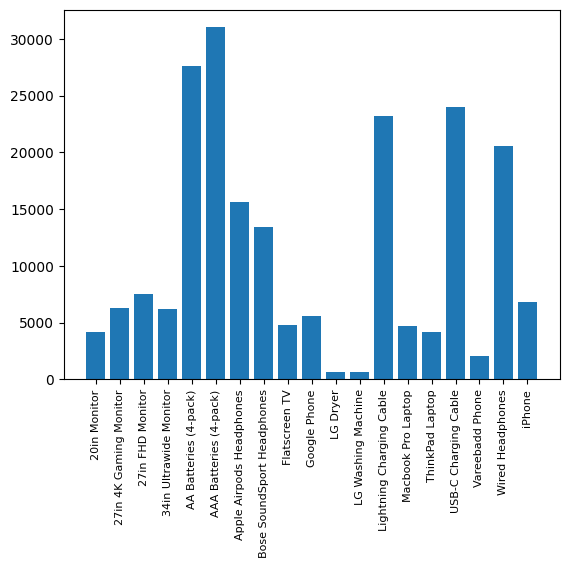

In [106]:
agrupado = completo.groupby('Product')
cantidad = agrupado.sum()['Quantity Ordered']

keys = [pair for pair, df in agrupado]
plt.bar(keys, cantidad)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-108-6de31b17c9e1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = completo.groupby('Product').mean()['Price Each']
<ipython-input-108-6de31b17c9e1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


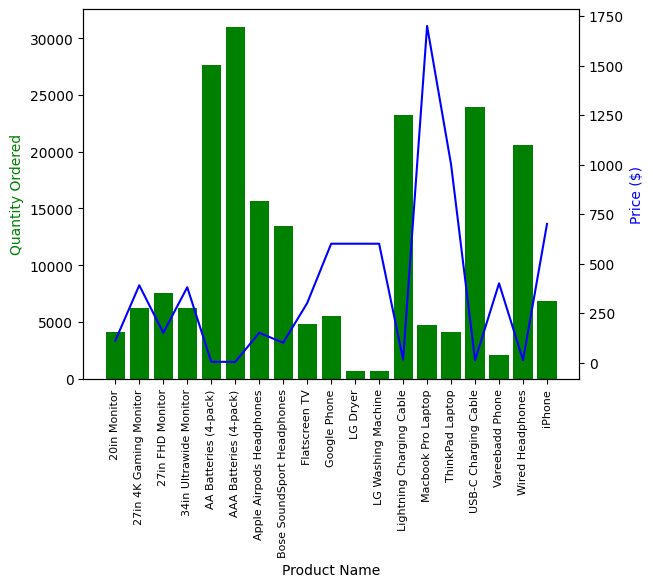

In [108]:
prices = completo.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, cantidad, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()